In [38]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [39]:
depth = xr.open_dataset('D:/MScData/depth_res.nc')
od = ospy.OceanDataset(depth)
depth = depth['Depth']

In [40]:
depth = depth.where(depth>0,np.nan)
depth_r = depth.rolling(X=10, center=True).mean()
depth_r = depth.rolling(Y=10, center=True).mean()

In [41]:
north_zonal = depth.sel(Y=78.5,method='nearest').sel(X=slice(-20,11)).dropna(dim="X")
north_zonal_moor = depth.sel(Y=78.5,method='nearest').sel(X=slice(0.3,8)).dropna(dim="X")


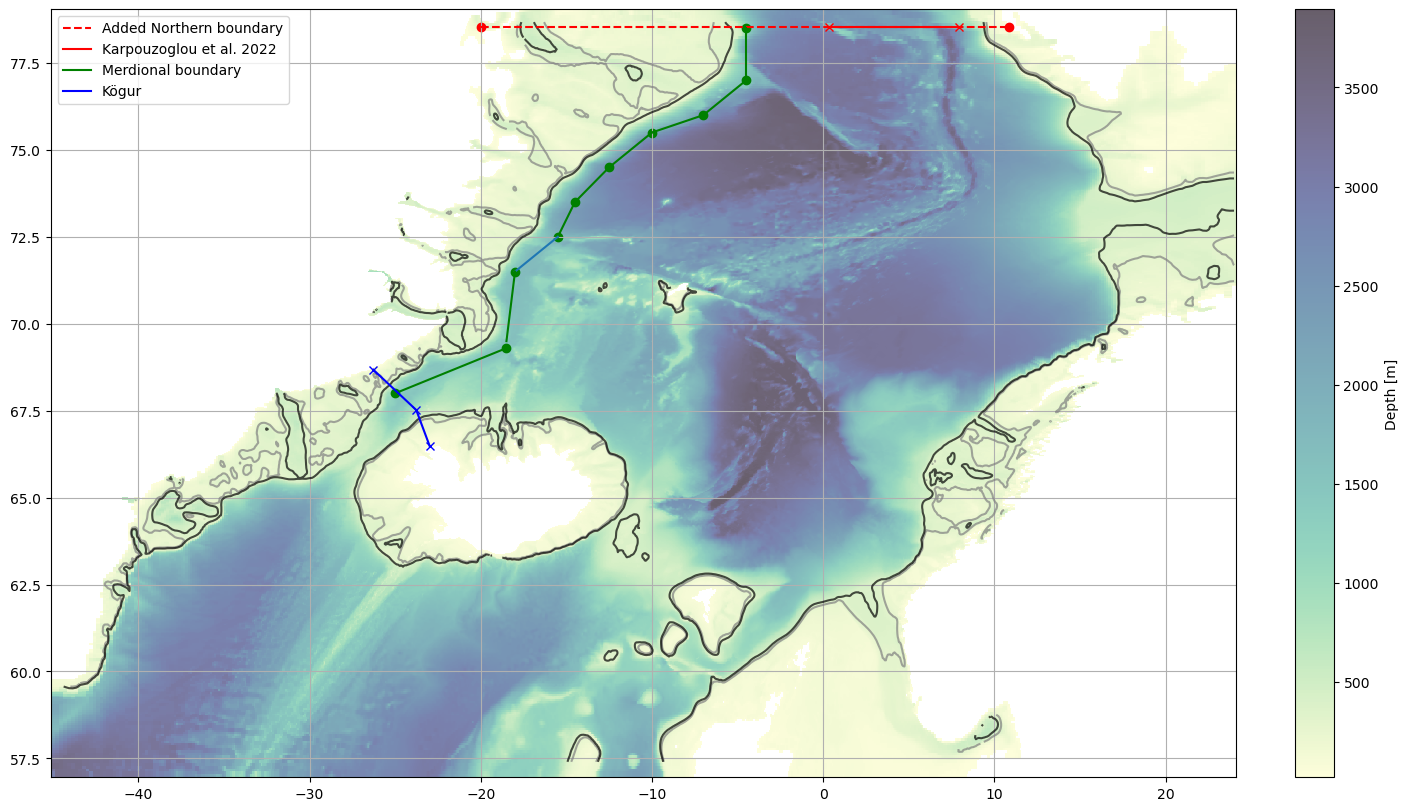

In [42]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')

# Meridional Section
ax.scatter(-4.5,78.5,color='g')
ax.scatter(-4.5,77,color='g')
ax.plot([-4.5,-4.5],[78.5,77],color='g',label='Merdional boundary')
ax.scatter(-7,76,color='g')
ax.plot([-4.5,-7],[77,76],'g')
ax.scatter(-10,75.5,color='g')
ax.plot([-7,-10],[76,75.5],'g')
ax.scatter(-12.5,74.5,color='g')
ax.plot([-10,-12.5],[75.5,74.5],'g')
ax.scatter(-14.5,73.5,color='g')
ax.plot([-12.5,-14.5],[74.5,73.5],'g')
ax.scatter(-15.5,72.5,color='g')
ax.plot([-14.5,-15.5],[73.5,72.5],'g')
ax.scatter(-18,71.5,color='g')
ax.plot([-15.5,-18],[72.5,71.5])
ax.scatter(-18.5,69.3,color='g')
ax.plot([-18,-18.5],[71.5,69.5],'g')
ax.scatter(-25,68,color='g')
ax.plot([-18.5,-25],[69.3,68],'g')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()

In [43]:
# coords = depth.sel(X=slice(-30,-22)).sel(Y=slice(65,70))
# fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
# mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep)
# cbar = fig.colorbar(mesh)
# cbar.set_label('Depth [m]')
# ax.grid()

# ax.set_xlim(coords.X[0],coords.X[-1])
# ax.set_ylim(coords.Y[0],coords.Y[-1])

In [44]:
# DS_section = od.subsample.mooring_array(Ymoor=[66,69],Xmoor=[-24,-25.5])

In [45]:
depth_s = xr.open_dataset('D:/MScData/depth_res.nc')['Depth']
# Add nan where depth = 0
depth_s = depth.where(depth>0,np.nan)

# Smooth the data with rolling of window size 9 in both lat/lon direction
depth_s = depth_s.rolling(X=5, center=True).mean().rolling(Y=5, center=True).mean()

# Selecting spesific domain and removing outliers
depth_s = depth_s.sel(Y=slice(67.5,78.5)).sel(X=slice(-26,-5))
condition = ((-20<=depth_s.X) & (depth_s.X<=-9)) & ((77<=depth_s.Y) & (depth_s.Y<=78.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-20<=depth_s.X) & (depth_s.X<=-15)) & ((75<=depth_s.Y) & (depth_s.Y<=77.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-15<=depth_s.X) & (depth_s.X<=0)) & ((70<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-18)) & ((73<=depth_s.Y) & (depth_s.Y<=75))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((72<=depth_s.Y) & (depth_s.Y<=73))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((71.5<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-30<=depth_s.X) & (depth_s.X<=-20)) & ((69.5<=depth_s.Y) & (depth_s.Y<=72.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-25<=depth_s.X) & (depth_s.X<=-15)) & ((67<=depth_s.Y) & (depth_s.Y<=68))
depth_s = depth_s.where(~condition, other=0)
condition = ((-22<=depth_s.X) & (depth_s.X<=-20)) & ((69.25<=depth_s.Y) & (depth_s.Y<=69.5))
depth_s = depth_s.where(~condition, other=0)
condition = ((-25<=depth_s.X) & (depth_s.X<=-24)) & ((68.75<=depth_s.Y) & (depth_s.Y<=69.25))
depth_s = depth_s.where(~condition, other=0)
condition = ((-21.25<=depth_s.X) & (depth_s.X<=-21)) & ((69.2<=depth_s.Y) & (depth_s.Y<=69.25))
depth_s = depth_s.where(~condition, other=0)


# Adjust mask for small tolerance around the desired range
desired_lower = 395
desired_upper = 405
tolerance = 0.01  # Adjust as necessary based on actual distribution seen

mask = (depth_s > desired_lower - tolerance) & (depth_s < desired_upper + tolerance)

# Drop NaNs
positions = mask.where(mask, drop=True)

# Verify mask summary
print("\nMask Summary (True values count) after adding tolerance:", np.sum(mask.values))


# Extract coordinates of the matching positions
coordinates = []
for y_coord in positions['Y'].values:
    for x_coord in positions['X'].values:
        if mask.sel(Y=y_coord, X=x_coord).values:
            coordinates.append((x_coord, y_coord))



Mask Summary (True values count) after adding tolerance: 154


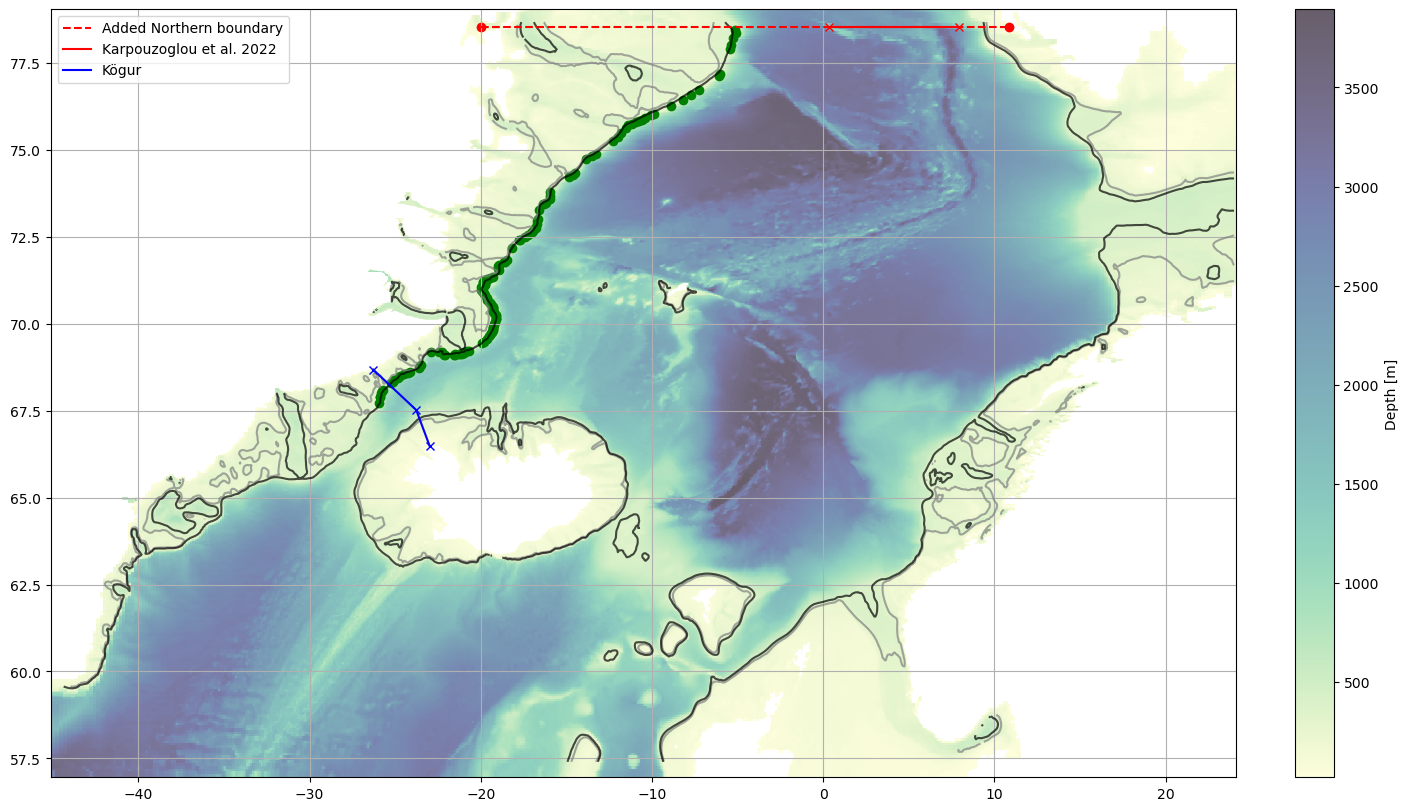

In [46]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')

# Meridional Section
for i in coordinates:
    ax.scatter(i[0],i[1],color='g')

# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()

In [47]:
import gsw
shelfLocation = []
distance = []
for i in coordinates:
    shelfLocation.append((i[0],i[1]))
for i in range(1,len(shelfLocation)):
        distance.append(gsw.distance([shelfLocation[i-1][0],shelfLocation[i][0]],[shelfLocation[i-1][1],shelfLocation[i][1]])[0])

display(np.mean(distance))

11548.655551888185

In [56]:
import gsw
shelfLocation = []

for i in coordinates:
    shelfLocation.append((i[0],i[1]))

data = [shelfLocation[0]]
shelfLocation.remove(shelfLocation[0])
while len(shelfLocation) !=0:
    print(len(shelfLocation))
    distance = []
    for i in range(len(shelfLocation)):
        distance.append(gsw.distance([data[-1][0],shelfLocation[i][0]],[data[-1][1],shelfLocation[i][1]]))
    if distance[0] < 20000:
        shelfLocation.remove(shelfLocation[0])
        continue
    loc = np.argmin(distance)
    data.append(shelfLocation[loc])
    shelfLocation.remove(shelfLocation[loc])

shelfLocation = data

with open("shelfLocation.txt",'w') as f:
    for step in range(len(shelfLocation)):
        if step != len(shelfLocation)-1:
            f.write(str(shelfLocation[step])+',')
        else:
            f.write(str(shelfLocation[step]))

153
152
151
150
149
148
147
146
145
144
143
142
141
140
139
138
137
136
135
134
133
132
131
130
129
128
127
126
125
124
123
122
121
120
119
118
117
116
115
114
113
112
111
110
109
108
107
106
105
104
103
102
101
100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [57]:
import ast
with open("shelfLocation.txt",'r') as f:
        data = f.read()
        shelfLocation = ast.literal_eval(data)

In [58]:
display(shelfLocation)

((-25.945269405, 67.72182567499998),
 (-25.879215025, 67.90230477999997),
 (-25.68238598, 68.08266394500002),
 (-25.230624110000008, 68.29322681499998),
 (-24.851339610000004, 68.443908915),
 (-24.478951290000005, 68.564722365),
 (-23.634781839999995, 68.73136267499997),
 (-22.936218755, 69.1902753),
 (-22.425941379999998, 69.17484634499999),
 (-22.258270824999997, 69.1902753),
 (-21.544723465000004, 69.11323352999997),
 (-21.009222945000005, 69.15942783999999),
 (-19.918169755000008, 69.43868346999999),
 (-19.513238055000002, 69.64295183999994),
 (-19.312791245, 69.81779029999994),
 (-19.21305323, 69.99470667499992),
 (-19.113631660000003, 70.22327469500001),
 (-19.312791245, 70.40587238),
 (-19.463003305, 70.59143782999999),
 (-19.76567351500001, 70.83241264),
 (-19.96917868500001, 71.04375456000001),
 (-19.81641790500001, 71.22364068499999),
 (-19.312791245, 71.35178564499999),
 (-18.915716895000003, 71.55718772499998),
 (-18.670011440000003, 71.76797778),
 (-18.1839353, 72.16698767

In [59]:
def calculate_perpendicular(lat1, lon1, lat2, lon2):
    # Calculate the vector from point 1 to point 2
    vector = np.array([lat2 - lat1, lon2 - lon1])
    # Calculate the perpendicular vector
    perp_vector = np.array([-vector[1], vector[0]])
    # Normalize the perpendicular vector
    perp_vector = perp_vector / np.linalg.norm(perp_vector)
    return perp_vector

In [62]:
transect_points = []

for i in range(len(shelfLocation) - 1):
    lon1, lat1 = shelfLocation[i]
    lon2, lat2 = shelfLocation[i + 1]
    perp_vector = calculate_perpendicular(lat1, lon1, lat2, lon2)
    
    # Ensure the transect goes in the positive longitude direction
    if perp_vector[1] < 0:
        perp_vector = -perp_vector
    
    # Define the length of the transect (e.g., 1 degree)
    transect_length = 1  # Adjust this value as needed
    
    # Generate points along the transect
    transect_lat = lat2 + perp_vector[0] * transect_length
    transect_lon = lon2 + perp_vector[1] * transect_length
    
    transect_points.append((transect_lat, transect_lon))

# Convert transect points to xarray DataArray or Dataset as needed
transect_ds = xr.Dataset({
    'lat': ('points', [p[0] for p in transect_points]),
    'lon': ('points', [p[1] for p in transect_points])
})

(65.0, 79.0)

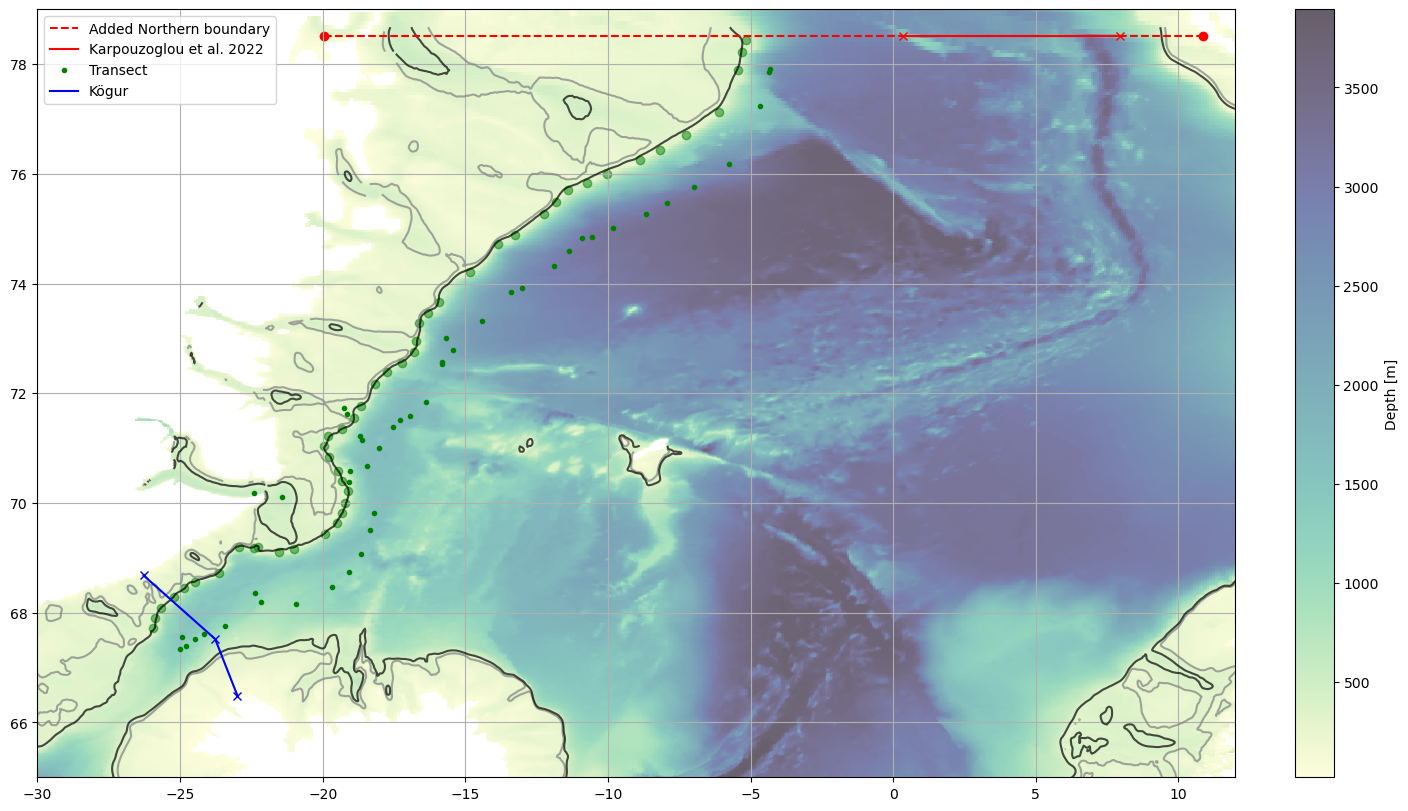

In [63]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')


# Meridional Section
for i in shelfLocation:
    ax.scatter(i[0],i[1],color='g', alpha=0.5)
# Plot the transect
transect_lats, transect_lons = zip(*transect_points)
ax.plot(transect_lons, transect_lats, 'g.', label='Transect')


# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()
ax.set_xlim(-30,12)
ax.set_ylim(65,79)

In [70]:
def calculate_perpendicular(latitudes, longitudes):
    # Calculate the vectors between consecutive points
    vectors = []
    for i in range(len(latitudes) - 1):
        vector = np.array([latitudes[i + 1] - latitudes[i], longitudes[i + 1] - longitudes[i]])
        vectors.append(vector)
    
    # Average the vectors
    avg_vector = np.mean(vectors, axis=0)
    
    # Calculate the perpendicular vector
    perp_vector = np.array([-avg_vector[1], avg_vector[0]])
    
    # Normalize the perpendicular vector
    perp_vector = perp_vector / np.linalg.norm(perp_vector)
    
    return perp_vector

transect_points = []
half_window_size = 2  # Half of the number of points to consider on each side

for i in range(half_window_size, len(shelfLocation) - half_window_size):
    latitudes = [shelfLocation[j][1] for j in range(i - half_window_size, i + half_window_size + 1)]
    longitudes = [shelfLocation[j][0] for j in range(i - half_window_size, i + half_window_size + 1)]
    
    perp_vector = calculate_perpendicular(latitudes, longitudes)
    
    # # Ensure the transect goes in the positive longitude direction
    # if perp_vector[1] < 0:
    #     perp_vector = -perp_vector
    
    # Define the length of the transect (e.g., 1 degree)
    transect_length = 1  # Adjust this value as needed
    
    # Generate points along the transect
    lon2, lat2 = shelfLocation[i]
    transect_lat = lat2 + perp_vector[0] * transect_length
    transect_lon = lon2 + perp_vector[1] * transect_length
    
    transect_points.append((transect_lat, transect_lon))

# Convert transect points to xarray DataArray or Dataset as needed
transect_ds = xr.Dataset({
    'lat': ('points', [p[0] for p in transect_points]),
    'lon': ('points', [p[1] for p in transect_points])
})

(65.0, 79.0)

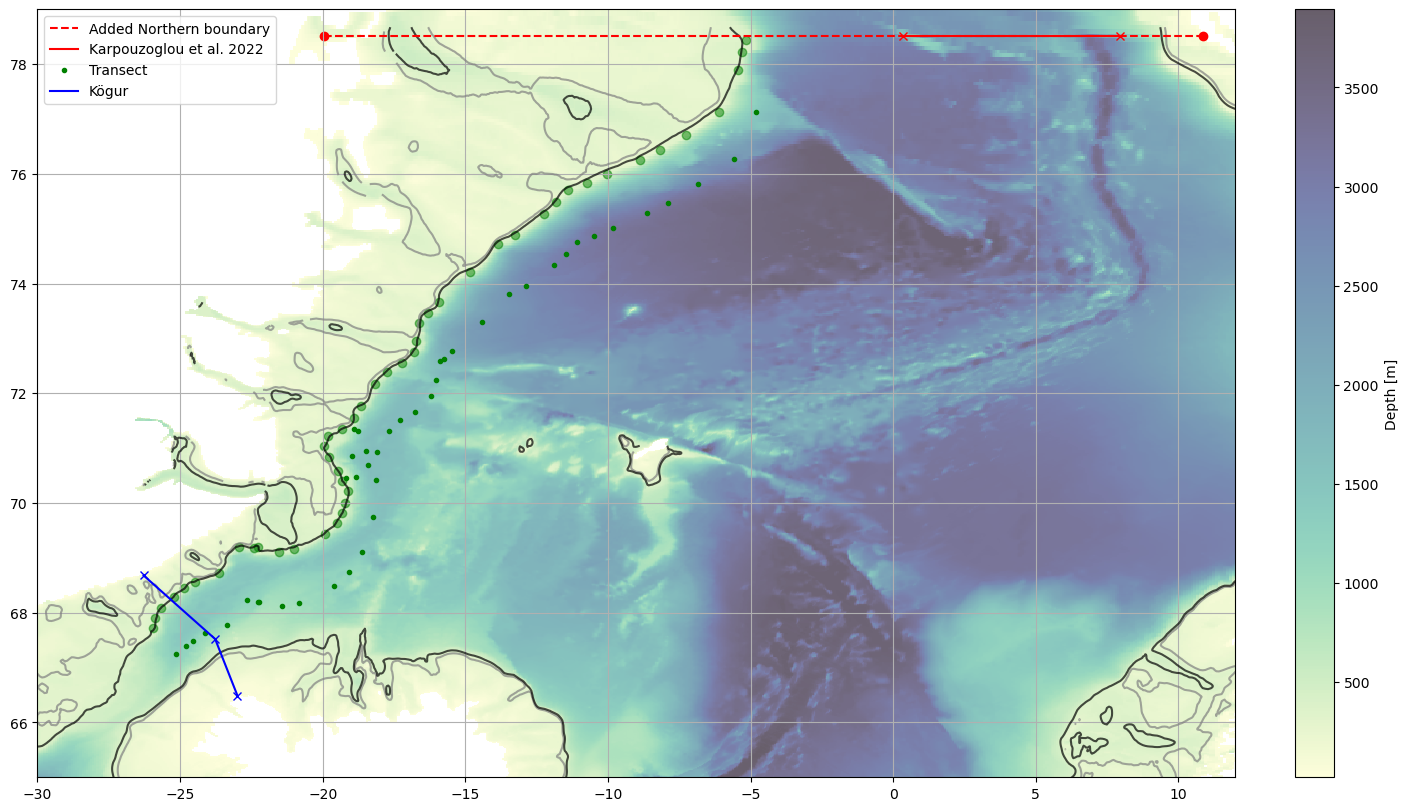

In [71]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep,alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[300],colors='grey',alpha=0.7)
cntr = ax.contour(depth_r.X,depth_r.Y,depth_r,[400],colors='black',alpha=0.7)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

# North section FS
ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r',label='Added Northern boundary')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'rx')
ax.plot([north_zonal_moor.X[0],north_zonal_moor.X[-1]],[north_zonal_moor.Y,north_zonal_moor.Y],'r',label='Karpouzoglou et al. 2022')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')


# Meridional Section
for i in shelfLocation:
    ax.scatter(i[0],i[1],color='g', alpha=0.5)
# Plot the transect
transect_lats, transect_lons = zip(*transect_points)
ax.plot(transect_lons, transect_lats, 'g.', label='Transect')


# South section DS Kögur
# Kögur information
lats_Kogur = [68.68, 67.52, 66.49]
lons_Kogur = [-26.28, -23.77, -22.99]
ax.plot(lons_Kogur,lats_Kogur,'bx')
ax.plot(lons_Kogur,lats_Kogur,'b',label='Kögur')

ax.legend()
ax.set_xlim(-30,12)
ax.set_ylim(65,79)